In [1]:
import os
import json
import csv
import flatdict
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# %run account_analysis_initial.ipynb

## Account visualization

##### Lists of following accounts (for security purposes)

In [2]:
with open('/Users/tayaerogers/Desktop/CS315/follow_list_77217.csv', 'r') as fil:
    follow_77217 = fil.read().split('\n')

In [3]:
with open('/Users/tayaerogers/Desktop/CS315/follow_list_74721.csv', 'r') as fil:
    follow_74721 = fil.read().split('\n')

In [4]:
follow_77777 = [] # manual

In [5]:
with open('/Users/tayaerogers/Desktop/CS315/follow_01.csv', 'r') as fil:
    follow_01 = fil.read().split('\n')

In [6]:
with open('/Users/tayaerogers/Desktop/CS315/follow_02.csv', 'r') as fil:
    follow_02 = fil.read().split('\n')

In [7]:
follow_03 = [] # manual

In [8]:
def list_of_news_accs(csv_in):
    """
    Takes news acc CSV (our shared Google Sheets file) and returns a list of news accounts
    """

    file = f"{csv_in}.csv"
    news_accs = []
    with open(file, mode ='r')as file:
        csvFile = csv.reader(file)
        for lines in csvFile:
            news_accs.append(lines[0])
    return news_accs

In [9]:
wd = "/Users/tayaerogers/Documents/MEDSL/GitHub/CS315-Project-2" # put personal wd ending in "/CS315-Project-2" here
account_wd = wd + "/analysis/news_accs/"
news_accs = list_of_news_accs(os.path.join(account_wd, 'news_accounts_03112024'))
news_accs

['nytimes',
 'washingtonpost',
 'cnn',
 'pbsnews',
 'abcnews',
 'msnbc',
 'cbsnews',
 'briantylercohen',
 'cbseveningnews',
 'abcworldnews',
 'nbcnews',
 'yahoonews',
 '7newsq',
 '',
 'skynews',
 'bbc',
 'forbes',
 'usatoday',
 'gbnews',
 'varietymagazine',
 'sophiasmithgaler',
 'maxfostercnn',
 'nytopinion',
 '60minutes',
 'cbsmornings',
 'cbssundaymorning',
 'vicenews',
 'abcnewslive',
 'gma',
 'newsweek',
 'underthedesknews',
 'theconversation',
 'nowthisimpact ',
 'dailymail',
 'davebondy',
 'aljazeeraenglish',
 'vicenewsdocs',
 'c4news',
 'itvnews',
 'niickjackson',
 'abc7la',
 'reuters',
 'npr',
 'nowthis',
 'brutamerica',
 'thetelegraph',
 'vox',
 'buzzfeednews',
 'taylorlorenz',
 'wallstreetjournal',
 'latimes',
 'natgeo',
 'vicderbyshire',
 'pinknews',
 'eveningstandard',
 'cleoabram',
 'sandragathmann',
 'tldrnews',
 'morningbrew',
 'semafor',
 'thepocketreport',
 'theeconomist',
 'thegarbagequeen',
 'nbcnightlynews',
 'benjaminzamoratven',
 'thenewsmovement',
 'elliecolts',


In [58]:
user_list = [('18853', follow_77777), ('77217', follow_77217), ('99568', follow_74721), ('01', follow_01), ('02', follow_02), ('03', follow_03)] # make this manually from lists given

In [62]:
user_dict = {'Other': [], 'News':[], 'Users': []}
for user in user_list:
    user_dict['News'].append(len(set(user[1]).intersection(news_accs)))
    user_dict['Other'].append(len(user[1])-len(set(user[1]).intersection(news_accs)))
    user_dict['Users'].append(user[0])
user_dict

{'Other': [795, 119, 161, 789, 84, 43],
 'News': [1, 1, 2, 4, 2, 0],
 'Users': ['18853', '77217', '99568', '01', '02', '03']}

In [63]:
df = pd.DataFrame(data=user_dict)
df.set_index('Users', inplace=True)
df

,Other,News
Users,,
18853,795,1
77217,119,1
99568,161,2
01,789,4
02,84,2
03,43,0


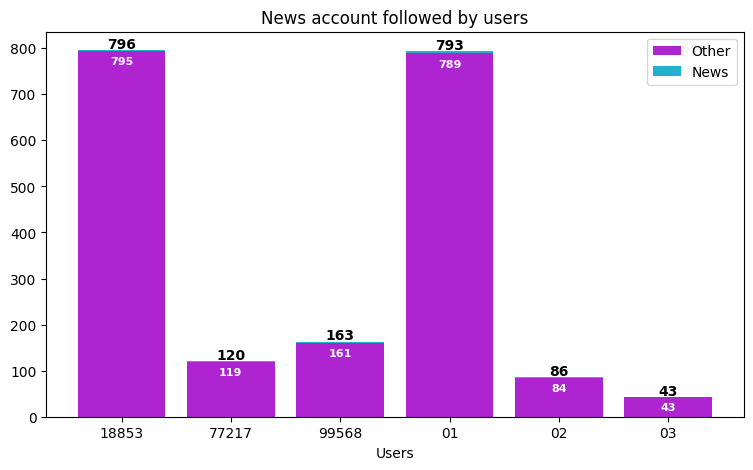

In [67]:
fig, ax = plt.subplots()

colors = ['#ae24d1', '#24b1d1']
bottom = np.zeros(len(df))

for i, col in enumerate(df.columns):
    ax.bar(df.index, df[col], bottom=bottom, label=col, color=colors[i])
    bottom += np.array(df[col])

totals = df.sum(axis=1)
y_offset = 4

for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), ha='center', weight='bold')
    
y_offset = -30
for bar in ax.patches:
    if bar.get_height() >= 10:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + bar.get_y() + y_offset,
            round(bar.get_height()),
            ha='center', color='w', weight='bold', size=8)


ax.set_xlabel("Users")
ax.set_title("News account followed by users")
ax.legend()

plt.gcf().set_size_inches(9, 5)